<a href="https://colab.research.google.com/github/bozhikov/SHE/blob/main/Deposition_by_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
class MC_depos_pattern():
  
  Q,temp,p,S,p00,DHa,Mg1,Mg2,M_iso,ro1,ro2,ro_iso=[],[],[],[],[],[],[],[],[],[],[],[]
  import numpy as np
  from matplotlib import pyplot as plt
  def __init__(self,t_half):
   self.t_half=t_half
   
   G=Q*(self.temp/298.15)*101325/self.p    # {corrected flow}
   Ui= G/(3.14*(0.5*self.S)^2)       #      {linear gas velocity, m/s}
   tm = self.p00 * np.exp(-self.DHa/(8.31447*self.temp))
   D298_Mg1=0.0043*298.15^(3/2)*(1/(self.Mg1)+1/(self.M_iso))^(1/2)/((self.p/101325)*((self.self.Mg1/self.ro1)^(1/3)+(self.M_iso/self.ro_iso)^(1/3))^2)
   D298_Mg2=0.0043*298.15^(3/2)*(1/(self.Mg2)+1/(self.M_iso))^(1/2)/((self.p/101325)*((self.self.Mg2/self.ro2)^(1/3)+(self.M_iso/self.ro_iso)^(1/3))^2)
   D298_mix=0.6*D298_Mg1+0.4* D298_Mg2
   D_t=D298_mix*(self.temp/298.15)^1.75/10000
   vi = ((0.5*self.S)/G) * (8 * 8.314 * self.temp /(3.14*self.M_iso/1000))^(1/2) #  {n° collisions per unit lenght
   Ri = (1/Ui)/((1/Ui)+(vi*tm))      #  {ratio: residence time in the gas phase / overall residence time}
   Nm = (3.14*(0.5*self.S)^2*D_t/G)+(11-(16*Ri)+(6*Ri*Ri))*(G/(24*3.14*D_t)) # {Nm = average jump length, m}


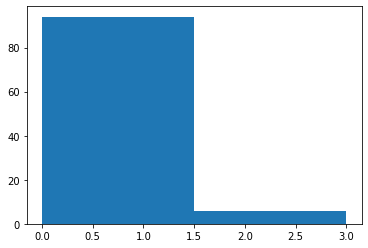

In [7]:
import numpy as np
output= np.random.poisson(0.5, 100)
from matplotlib import pyplot as plt
count, bins, ignored = plt.hist( output, 3)
plt.show()


In [22]:
y=np.mean(output)
y

0.47

In [23]:
output

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0])

In [29]:
class Nuclei_track:
  t=[]
  import numpy as np
  def __iter__(self):
    self.a = 0
    
    return self

  def __next__(self):
    if self.a <= self.t:
      x = self.a
      b=np.random.poisson(0.2,1)
      self.a = self.a + b[0]
      return b[0]
    else:
      raise StopIteration

#myclass = MyNumbers()

#myiter = iter(myclass)

#for x in myiter:


In [24]:

a=5
Nuclei_track.t=a


In [31]:
track = Nuclei_track()
m=iter(track)

In [40]:
c=[]

for ii in m:
  print((ii))

0
0
0
0
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
4
4
5
5


In [66]:
c=np.ndarray(1,dtype=int)

c

array([10])

In [4]:
b

[0, 0, 3, 3, 4, 4, 4, 4, 4]

In [5]:
myclass.a


6

In [86]:
b[1]

2

In [90]:
c=iter(b)
c

In [6]:
import numpy as np

In [33]:
class input_species:
  c,g=[],[]
  import numpy as np
  def __init__(self,Number,Life_time):
    self.Number=Number
    self.Life_time=Life_time
    a=np.random.poisson(Life_time,Number)
    a1=[a]
    self.g.append(a1)

    for i in range(Number):
     Nuclei_track.t=a[i]
     track = Nuclei_track()

     m = iter(track)
     b=list(m)
    #for x in m:
     self.c.append(b[-1])



In [7]:
b=[]
import numpy as np
a=np.random.poisson(2,3)
for i in range(3):
  b.append(a[i])


In [12]:
b

[1, 0, 1]

In [62]:
input_species(2,4)

In [63]:
input_species.c

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1]

In [61]:
input_species.g

[[array([3, 2])],
 [array([5, 8])],
 [array([6, 4])],
 [array([5, 0])],
 [array([4, 6])],
 [array([4, 2])]]

In [55]:
b=np.random.poisson(0.2,1)
b[0]

0

In [34]:
class Example:
    def __init__(self):
        print("Instance Created")
      
    # Defining __call__ method
    def __call__(self):
        print("Instance is called via special method")
  
# Instance created
e = Example()


Instance Created


Instance is called via special method


In [9]:
import numpy as np
output= np.random.poisson(5, 1)
output

array([10])

In [38]:
class figna:
  def putamadre(self):

SyntaxError: ignored

In [3]:
s = 'abc'
it = iter(s)
next(it)

'a'

In [6]:
next(it)


StopIteration: ignored

In [12]:
message

In [13]:
class MyNumbers(output)

SyntaxError: ignored